# Pymaceuticals Inc.
---


### Analysis
1.  Because we are concentrating our global analysis re: the effectiveness of Capomulin (our drug), we will focus statistical data on this drug versus other regimens and placebos. We see via bar and pie charts that Capomulin is a) More or less equal with other regimen groups as far as the number of mice; also, b) as the mouse population if 51/49% male vs. female, gender isn't a significantly influential factor in medicinal response.

2.  Capomulin does seem to be effective treatment for cancerous tumors as we see that a random unique mouse ("Mouse ID"). On this line chart, we see that a mouse over time *does* show a decrease in tumor size as the time period of the study progressed. In the single mouse (s185) in this case, tumor volume nearly shrunk to half its original at the beginning of the trial (rf. line chart).
  
3.  Also, on Capomulin regimen, mice (rf. Box Chart with whiskers) tend to have a lower volume/size of tumor vs the other regimens, as with Ramicane. Unlike Infubinol (the only regimen with outliers) and larger sized tumors on mice. (Mice weight vs Tumor volume has positive correlation, Linear regression equation with positive slope: y = 0.9544396890241047x + 21.55216053268501)

4. The Correlation Coefficient of .84 indicates this positive linear correlation. (Correspondingly, mice who weigh more do not respond as well to Capomulin (and if you graph all other regimens, you should likely say the same).


5. The presence of only one outlier across all four data sets of interest indicates that this study was conducted via consistent and controlled methods of data recording and measuring. Thus, there is no need to suspect any bias in the study. In other words, the number of mice subjected to any regimen is not constant but still renders statistically significant insights when comparing the effectiveness of all trial regimens.
ors in mice.

 

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [217]:
# Checking the number of mice.
#Using nunique function, gives the number of unique
print("Number of unique mice IDs: ", mouse_data_complete['Mouse ID'].nunique())


Number of unique mice IDs:  249


In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Use duplicated and unique functions to isolate the duplicate IDs

duplicate_mouse_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

#uses boolean "True"/"False" indexing for each row, if "True" then its a duplicate
#duplicate_mouse_ids is a NumPy array containing the unique 'Mouse ID' values that have duplicate Timepoint entries in the original DataFrame

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
#Can Use conditionals for the duplicates but not necessary for this exercise, Boolean Indexing
#if len(duplicate_mouse_ids) > 0:
print("Mouse IDs with duplicate time points: ", duplicate_mouse_ids)

    #df[df['column_name'].isin(list_of_values)]
    #list_of_values: A list or array of values you want to check for in the specified column

duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]
    
print("Data for duplicate mouse IDs:")
print(duplicate_mouse_data)





Mouse IDs with duplicate time points:  ['g989']
Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26 

In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #The Boolean "False" drops the duplicates

clean_df = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]

#other method, dropping duplicates:
#clean_mouse_data = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
#print(clean_mouse_data)

In [114]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Group the data by drug regimen

regimen_groups = clean_mouse_data.groupby(['Drug Regimen'])

summary_stats = regimen_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#######I already used the aggregation method above, which should be sufficient per instructions########


## Bar and Pie Charts

In [134]:
#Calculate the number of rows of unique Mouse IDs by Regimen
regimen_counts = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

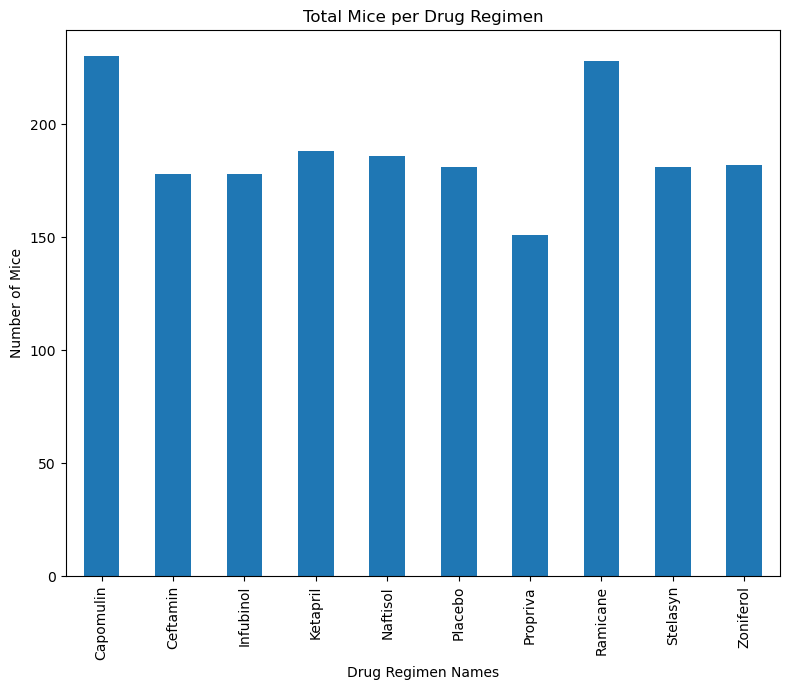

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [155]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts.plot(kind='bar', figsize=(8,7), title='Total Mice per Drug Regimen')
#Other option: plot_pandas = regimen_counts.plot.bar(figsize=(8,7), color='b',fontsize = 14)
plt.xlabel("Drug Regimen Names")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()

regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

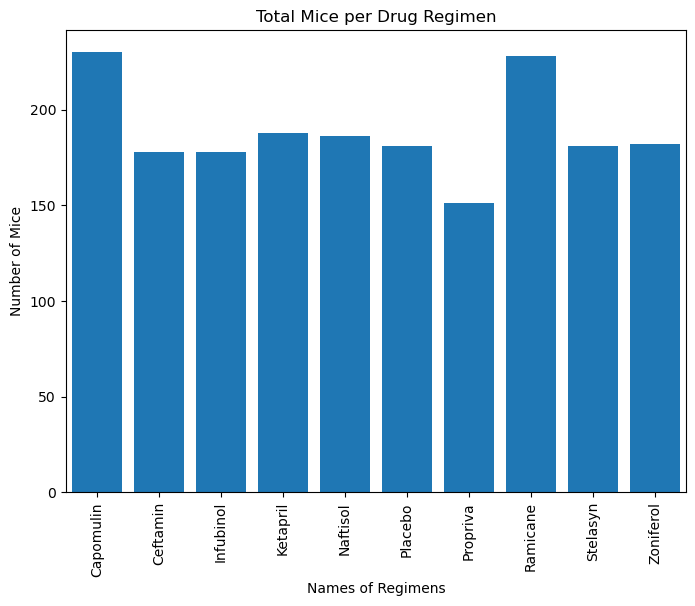

In [162]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Option Using matplotlib
regimen_counts.plot(kind='bar', figsize=(8,6)) 
plt.bar(regimen_counts.index, regimen_counts.values)



plt.title('Total Mice per Drug Regimen')
plt.xlabel('Names of Regimens')
plt.ylabel('Number of Mice')

#using ticks options in formatting
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')



regimen_counts





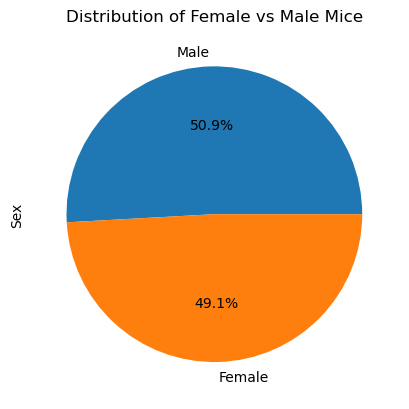

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_mouse_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex',fontsize = 10)

plt.show()

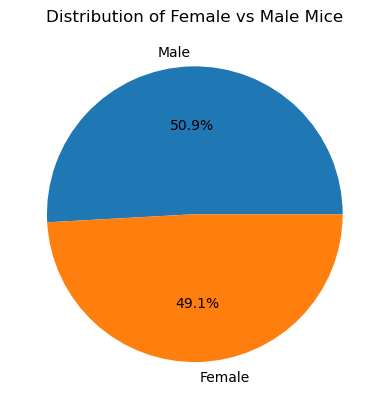

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')


plt.title('Distribution of Female vs Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [171]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_timepoint = max_timepoint.rename(columns={'Timepoint': 'Max Timepoint'})


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merging the max timepoint data with the original cleaned df
merged_max = pd.merge(clean_mouse_data, max_timepoint, on='Mouse ID')

merged_max



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2,45
1879,z969,Naftisol,Male,9,30,30,65.841013,3,45
1880,z969,Naftisol,Male,9,30,35,69.176246,4,45
1881,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [237]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
#Need a loop that goes through each row

for drug in treatment_list:
    drug_data = merged_max.loc[merged_max['Drug Regimen'] == drug]
    final_tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)



    

quartiles = final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    # add subset 
    
# Determine outliers using upper and lower bounds
#using enumerate, provides both the index (i) and the value (drug) at each iteration
for i, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}")


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


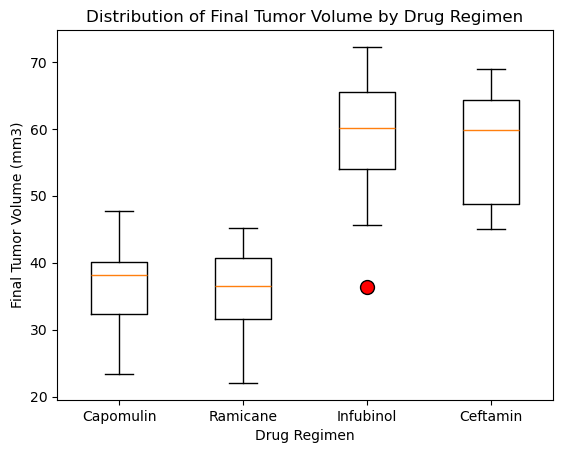

In [242]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()


ax.boxplot(tumor_volume_data, labels=treatment_list, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

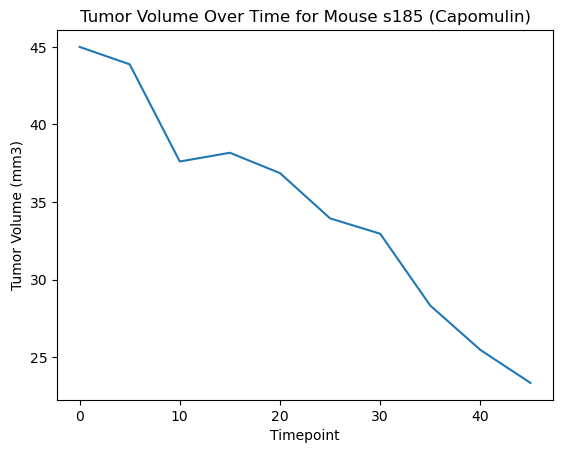

In [200]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


#  Filter the clean_mouse_data to only include rows where the Drug Regimen is == Capomulin, we are slicing
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# list of unique Mouse ID values that correspond only to mice treated with Capomulin
capomulin_mice = capomulin_data['Mouse ID'].unique()

# Select a single Mouse ID from the list of unique Mouse ID values
selected_mouse = capomulin_mice[0]

# Filter the capomulin_data to only include rows where the Mouse ID is the selected Mouse ID, slicing again
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

# Create a line plot of tumor volume versus timepoint for the selected mouse
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])

plt.title(f'Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

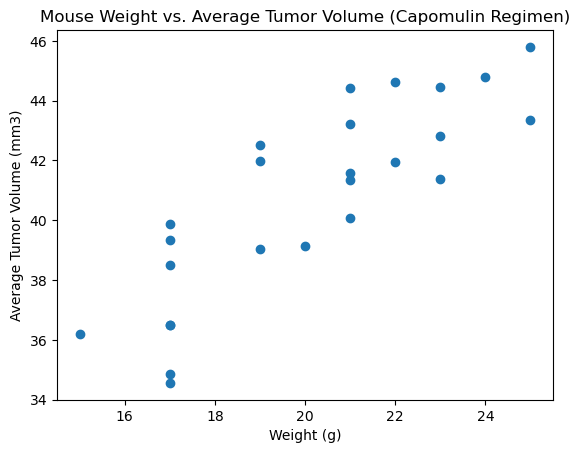

In [214]:
# Reminder, again filter the data to only include the Capomulin treatment regimen
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin group, slicing again
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata (where we find the weights) to get the weight for each mouse
capomulin_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulin_data_with_weight['Weight (g)'], capomulin_data_with_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

In [230]:
import scipy.stats as st

# Assuming avg_tumor_volume is your DataFrame
correlation_coefficient, p_value = st.pearsonr(capomulin_data_with_weight['Weight (g)'], capomulin_data_with_weight['Tumor Volume (mm3)'])

# Print the correlation coefficientn 
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")


Pearson Correlation Coefficient: 0.841936342469472


Correlation coefficient: 0.841936342469472
Linear regression equation: y = 0.9544396890241047x + 21.55216053268501


<bound method Axes.plot of <Axes: title={'center': 'Linear Regression of Correlation between Mouse Weight and Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>>

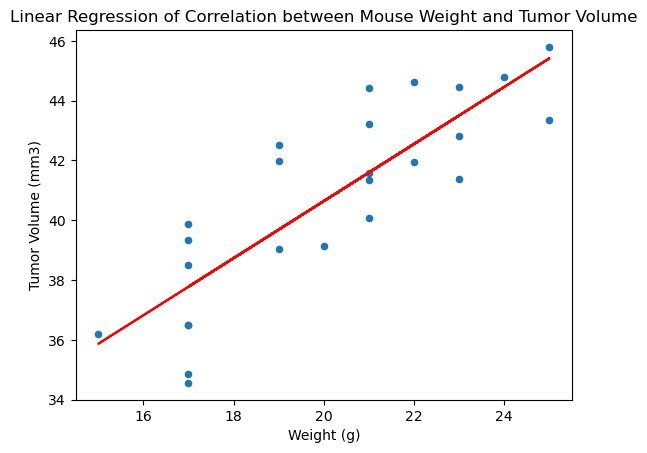

In [234]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen

# Import dependencies
from scipy.stats import linregress


# Generate a scatter plot of mouse weight versus average tumor volume
ax = capomulin_data_with_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

# Calculate the correlation coefficient (0.84 from before) and linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_data_with_weight["Weight (g)"], capomulin_data_with_weight["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {rvalue}")
print(f"Linear regression equation: y = {slope}x + {intercept}")

# Add the linear regression line to the scatter plot
x = capomulin_data_with_weight["Weight (g)"]
ax.plot(x, slope*x + intercept, color="red")
plt.title("Linear Regression of Correlation between Mouse Weight and Tumor Volume")
ax.plot
